In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv('cleaned_data.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.head()
dataset.dtypes

Date             datetime64[ns]
Store                     int64
DayOfWeek                 int64
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [19]:
# pull out year, month, and day to an own column
dataset2 = dataset



In [22]:
dataset2['year'] = pd.DatetimeIndex(dataset2['Date']).year
dataset2['month'] = pd.DatetimeIndex(dataset2['Date']).month
dataset2['day'] = pd.DatetimeIndex(dataset2['Date']).day
dataset2.head()


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31


In [23]:
# Dataset with Sales (y) at the end
dataset2 = dataset2[["year", "month", "day", "DayOfWeek", 
                                     "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday", "Sales"]]

In [41]:
# into X and y
dataset2.shape
dataset[dataset['StateHoliday'] == 1 & dataset['Open']]

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StoreType,Assortment,StateHoliday,SchoolHoliday,StoreType.1,CompetitionDistance,Competition,Promo2
63555,63555,1,4,2015-06-04,0,0,0,1,2,0,1,0,2,1270.0,1,0
63557,63557,3,4,2015-06-04,0,0,0,1,0,0,1,0,0,14130.0,1,1
63559,63559,5,4,2015-06-04,5807,625,1,1,0,0,1,0,0,29910.0,1,0
63560,63560,6,4,2015-06-04,5749,614,1,1,0,0,1,0,0,310.0,1,0
63563,63563,9,4,2015-06-04,0,0,0,1,0,2,1,0,0,2030.0,1,0
63567,63567,13,4,2015-06-04,0,0,0,1,3,0,1,1,3,310.0,1,1
63568,63568,14,4,2015-06-04,0,0,0,1,0,0,1,0,0,1300.0,1,1
63570,63570,16,4,2015-06-04,0,0,0,1,0,2,1,1,0,3270.0,1,0
63573,63573,19,4,2015-06-04,0,0,0,1,0,2,1,0,0,3240.0,1,1
63574,63574,20,4,2015-06-04,0,0,0,1,3,0,1,1,3,2340.0,1,1


In [25]:
# split dataset
>>> import numpy as np
>>> from sklearn.model_selection import TimeSeriesSplit

# Multiple Linear Regression

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('cleaned_and_merged_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

FileNotFoundError: [Errno 2] File b'cleaned_and_merged_data.csv' does not exist: b'cleaned_and_merged_data.csv'

In [ ]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

Test run

In [28]:
dataset = pd.read_csv('Team1/cleaned_and_merged_data.csv')

In [ ]:
# change column orders
#dataset = dataset2[["year", "month", "day", "DayOfWeek", 
                                     "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday", "Sales"]]

In [30]:
corr_matrix = dataset.corr()

In [31]:
corr_matrix["Sales"].sort_values(ascending=False)

Sales                  1.000000
Customers              0.892547
Open                   0.678176
Promo                  0.456540
SchoolHoliday          0.090637
Assortment             0.081756
Store                  0.004295
Competition           -0.006555
StoreType.1           -0.009143
StoreType             -0.009143
CompetitionDistance   -0.015331
Unnamed: 0            -0.031739
Promo2                -0.089948
StateHoliday          -0.222024
DayOfWeek             -0.469245
Name: Sales, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12085f400>,
      dtype=object)

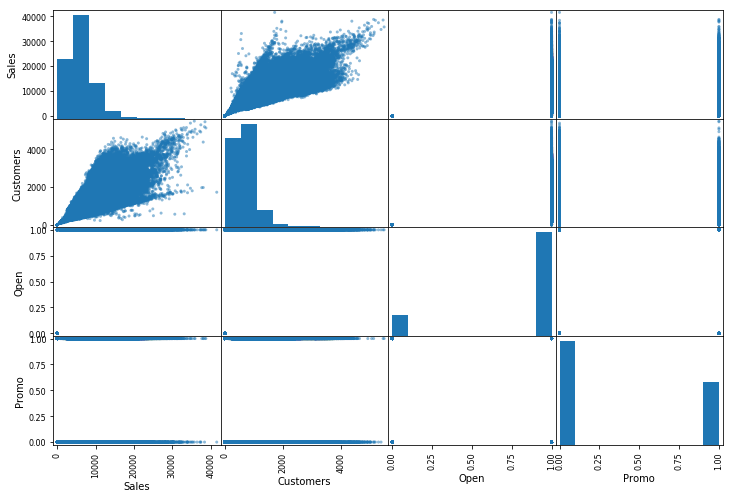

In [33]:
from pandas.plotting import scatter_matrix

attributes = ["Sales", "Customers", "Open",
              "Promo"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

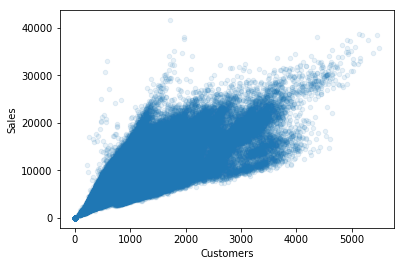

In [39]:
dataset.plot(kind="scatter", x="Customers", y="Sales",
             alpha=0.1)